## Getting Intraday Currencies CandleStick

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime, timedelta


#### API login


In [9]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

### Importing and Plotting Function

In [3]:
def getIntradayCandleStickPlot(symbols, date, initTime, endTime, time_frequency):
    def getDate(date):
        if date is not None:
            initDate = date
            endDate = pd.date_range(date, periods=2)
            endDate = f'{endDate[1]}'
            endDate = endDate[0:10]

            date = {
                "initDate": initDate,
                "endDate": endDate

                    }
            return date

        initDate = str((datetime.datetime.today() - datetime.timedelta(days=1)).date())
        endDate = str((datetime.datetime.now() + datetime.timedelta(days=1)).date())

        date = {
            "initDate": initDate,
            "endDate": endDate

        }
        return date

    def getTime(date, initTime, endTime):
        if initTime is None and endTime is None:
            initTime = datetime.datetime.today() - datetime.timedelta(minutes=120)
            endTime = datetime.datetime.today() - datetime.timedelta(minutes=2)
            time = {
                "initTime": initTime,
                "endTime": endTime
                }
            return time



        time = {
            "initTime": f'{date} {initTime}',
            "endTime": f'{date} {endTime}'
        }

        return time

    if date is not None:
        if initTime is None or endTime is None:
            print('If "Date" has been passed, "initTime" and "endTime" are required')
            return None


    checked_date = getDate(date)
    time = getTime(date, initTime, endTime)

    initDateTime = time["initTime"]
    endDateTime = time['endTime']
    raw_data5 = te.getMarketsIntraday(symbols=symbols, initDate=checked_date["initDate"], endDate=checked_date["endDate"], output_type='df')

    raw_data5 = raw_data5.sort_values('Date')
    raw_data5['Date'] = pd.to_datetime(raw_data5['Date'])
    raw_data5 = raw_data5.set_index('Date')
    raw_data6 = raw_data5.resample(time_frequency).mean()
    data_to_plot = raw_data6.loc[initDateTime: endDateTime]

    mpf.plot(data_to_plot, type='candle', style='charles', figsize=(15, 10))


#### Plot Request
"time_Frequency":
'T' for minutes
'H' for hours

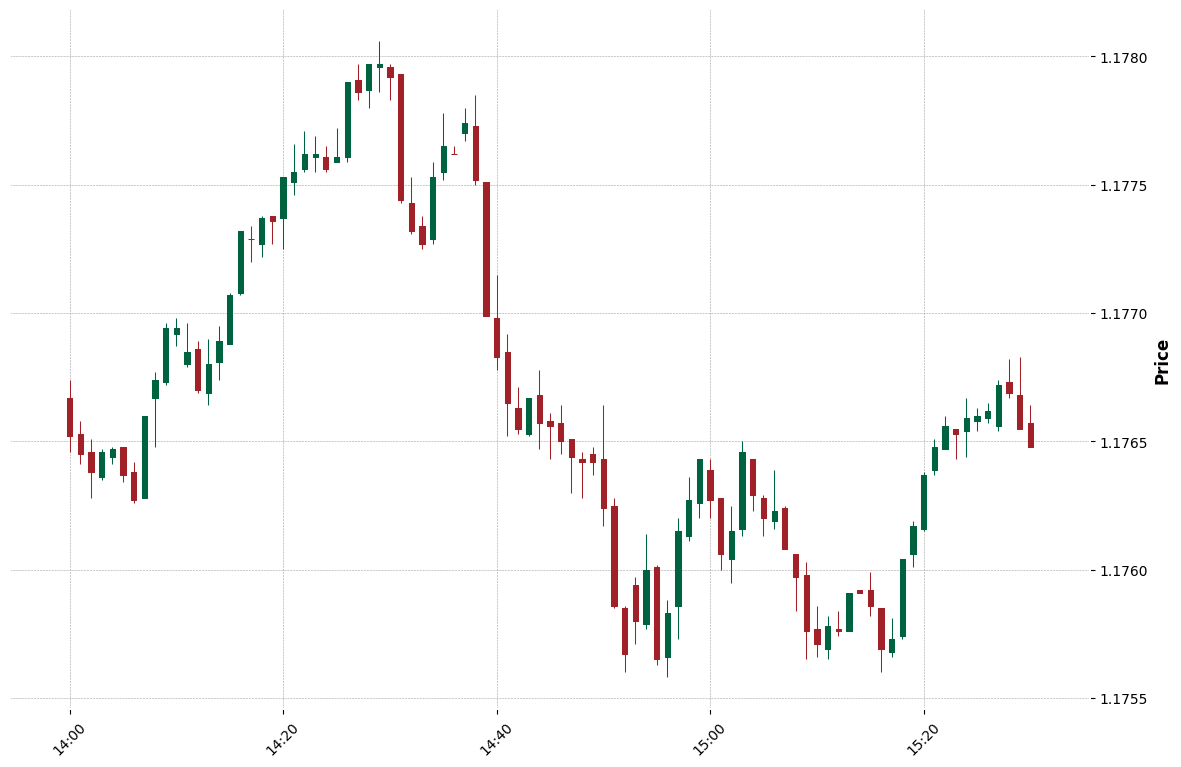

In [8]:
symbols = 'EURUSD:CUR'
date = "2021-07-20" # if None, current date will be used.
initTime = '14:00:00' # if None, two hour time interval will be used
endTime = '15:30:00' # if None, current time will be used

getIntradayCandleStickPlot(symbols=symbols, date=date, initTime=initTime, endTime=endTime, time_frequency='T')